In [361]:


import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras.preprocessing.image import load_img


from keras import optimizers
 
import numpy as np


In [362]:
import os
root=os.getcwd()


In [363]:
from collections import defaultdict
import glob
paras=list()
uninfect=list()
for pics in glob.glob(root+"/Parasitized/*"):
    paras.append(pics)
for pics in glob.glob(root+"/Uninfected/*"):
    uninfect.append(pics)
uninfect

["C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_131.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_144.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_21.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_25.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_34.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_48.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_images/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_65.png",
 "C:\\Users\\Abhishek's PC\\Desktop\\datasets\\cell_i

In [364]:
import cv2 as cv
import pandas as pd

In [365]:
img_paras=list()
img_uni=list()

for pic1 in paras:
    img_paras.append(cv.imread(pic1,0))
for pic2 in uninfect:
    img_uni.append(cv.imread(pic2,0))
    
print(len(img_uni))

13780


In [366]:
re_img_paras=list()
re_img_uni=list()
label=list()
for i in range(len(img_paras)-1):
    re_img_paras.append(cv.resize(img_paras[i],(100,100)))
    label.append(0)
for j in range(len(img_paras)-1):
    re_img_uni.append(cv.resize(img_uni[j],(100,100)))
    label.append(1)

In [367]:
label[27557]

1

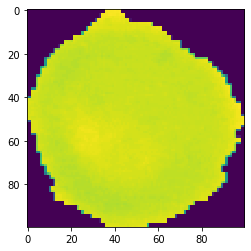

In [368]:
from matplotlib import pyplot as plt
plt.imshow(re_img_uni[10], interpolation='nearest')
plt.show()


In [369]:
all_img=list()
for i in range(len(img_paras)-1):
    all_img.append(re_img_paras[i])
    
for j in range(len(img_paras)-1):
    all_img.append(re_img_uni[i])
len(all_img)
all_img[1].shape

(100, 100)

In [370]:
df = pd.DataFrame()
df['data']=all_img
df['labels']=label

In [371]:
from sklearn.utils import shuffle
df_sh=shuffle(df)
df_sh

,data,labels
17703,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
10775,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
20035,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
10497,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
7527,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
25751,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
27488,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
17004,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
23008,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
5548,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [372]:
df_sh=df_sh.reset_index()

df_sh

,index,data,labels
0,17703,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1,10775,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,20035,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,10497,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
4,7527,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
5,25751,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
6,27488,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
7,17004,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
8,23008,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
9,5548,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


In [373]:
df_sh['index']

0        17703
1        10775
2        20035
3        10497
4         7527
5        25751
6        27488
7        17004
8        23008
9         5548
10       19148
11       25354
12        7268
13       22770
14       21932
15       26133
16       12735
17        8867
18       26972
19        3029
20       15810
21        9721
22        6246
23       19181
24       12904
25        3367
26        4652
27       13074
28        7870
29       10932
         ...  
27528    16576
27529    14184
27530     4134
27531    21040
27532    21350
27533    18058
27534     8667
27535    26852
27536    21961
27537    26316
27538    14324
27539     9176
27540    19573
27541     7281
27542    10326
27543     2989
27544     3211
27545    24571
27546    16093
27547    26659
27548     3107
27549    20438
27550    26562
27551    11238
27552    23060
27553    17145
27554    17800
27555    14505
27556    18818
27557     9157
Name: index, Length: 27558, dtype: int64

In [374]:
l=list()
m=list()
for i in range(len(df_sh)):
    l.append(df_sh['data'][i])
for j in range(len(df_sh)):
    m.append(df_sh['labels'][j])
    print(df_sh['labels'][j])

x=np.array(l)
y=np.array(m)
x=np.reshape(x,(27558,100,100,1))
print(x.shape)
#y=np.reshape(y,(27558,1))
print(y)

1
0
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
1
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
0
0
1
0
1
1
1
1
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
0
1
0
0
1
0
1
0
1
1
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
1
0
0
0
0
0
0
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
0
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
0
1
0
0
1
0
1
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
1
1
1
1
1
0
1
0
1
1
1
1
0
1
0
0
1
0
1
1
0
1
0
1
0
0
1
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
1
1
0
1
1
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0


1
0
0
1
1
1
0
0
1
0
1
0
1
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
0
1
0
1
1
1
0
0
0
1
0
0
1
1
0
1
1
1
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
0
0
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
0
0
1
0
0
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
1
1
0
1
0
1
1
1
1
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1


0
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
1
0
0
0
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
0
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
1
1
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
1
0
0
1
0
1
0
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
1
1
0
0
1
0
1
1
1
0
1
1
0
0
1
0
0
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
1
1
1
1
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
1
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
0
0
0
1
0
0
1
1
0
1
1
1
0
1
0
1
1
0
1
0
0
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
1
0
0
0


0
1
1
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
1
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
0
0
1
0
1
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
0
1
1
1
1
0
1
0
0
0
0
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
1
1
1
1
0
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
1
1
0
1
1
1
0
0
1
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
0
0
1
0
0
1
0
0
0
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
0
1
0
1
0
0
1
0
1
0
1
1
1
0
0
1
0
0
0
0
1
1
1
1
1
0
0
1
1
0
0
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
0
1
1
1
1
0
0
0
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
1
0
0
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
0


0
1
1
0
0
0
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
1
0
0
1
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
0
1
0
1
1
1
0
0
0
1
0
0
1
0
0
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
1
1
1
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
1
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
1
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
1
0
1
1
1
1
0
0


0
1
0
1
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
0
1
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
1
1
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
1
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
0
1
0
1
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
1
0
1
1
0
0
1
1
1
0
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
0
1
0
1
0
1
0
0
1
0
0
0
0
0
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
1
1
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
1
0
0
1
0
1
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
1
1


In [375]:
x_train=np.array(x[0:18000])
y_train=np.array(y[0:18000])
x_val=np.array(x[18001:22000])
y_val=np.array(y[18001:22000])
x_test=np.array(x[22001:27557])
y_test=np.array(y[22001:27557])
x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')  
x_train /= 255  
x_test /= 255 
x_val = x_val.astype('float32')  
x_val /= 255 
y_train = keras.utils.to_categorical(y_train, 2) 
y_val=keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_test.shape

(5556, 2)

In [376]:
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D
# model=Sequential()
# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# #model.add(Conv2D(36,kernel_size=(3,3),activation='relu'))
# #model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(8,kernel_size=(1,1),activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Flatten())  
# model.add(Dense(128, activation='relu'))  
# model.add(Dense(64, activation='relu')) 
# model.add(Dense(32, activation='relu')) 
# model.add(Dense(2, activation='softmax'))  
model = Sequential()  
model.add(Conv2D(8, kernel_size=(3, 3),  
         activation='relu',  
         input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(16, (3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())  
model.add(Dense(64, activation='relu'))  
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  

In [377]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 98, 98, 8)         80        
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 49, 49, 8)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 47, 47, 16)        1168      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 8464)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 64)                541760    
_________________________________________________________________
dense_117 (Dense)            (None, 32)                2080      
__________

In [388]:
model.compile(loss=keras.losses.categorical_crossentropy,  
       optimizer=keras.optimizers.Adadelta(),       
       metrics=['accuracy'])
#use categorical_crossentropy for one hot encoding instead of sparse_categorical_crossentropy
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(18000, 100, 100, 1)
(18000, 2)
(3999, 100, 100, 1)
(3999, 2)


In [386]:
 model.fit(x_train,y_train,batch_size=100,epochs=2,validation_data=(x_val,y_val ))  

Train on 18000 samples, validate on 3999 samples
Epoch 1/2
18000/18000 [==============================] - 48s 3ms/step - loss: 0.0819 - acc: 0.9639 - val_loss: 3.3576e-04 - val_acc: 1.0000
Epoch 2/2
18000/18000 [==============================] - 46s 3ms/step - loss: 1.7576e-04 - acc: 1.0000 - val_loss: 3.1247e-05 - val_acc: 1.0000


In [389]:
score = model.evaluate(x_test, y_test, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1]) 

Test loss: 0.00033494125601969313
Test accuracy: 1.0
